#  Prepare a classification model using SVM for forestfire


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
forestfire=pd.read_csv("C:\\Users\\Anjana\\Desktop\\DS Assignments\\Support Vector Machine\\forestfires.csv")

In [3]:
forestfire

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [4]:
forestfire.shape

(517, 31)

In [5]:
forestfire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [6]:
forestfire.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [7]:
forestfire.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [8]:
forestfire.drop(columns=["month","day","dayfri","daymon","daysat","daysun","daythu","daytue","daywed","monthapr","monthaug","monthdec","monthfeb","monthjan","monthjul","monthjun","monthmar","monthmay","monthnov","monthoct","monthsep"],axis=1,inplace=True)

In [9]:
forestfire.columns

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'size_category'],
      dtype='object')

In [10]:
forestfire.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


<AxesSubplot:xlabel='size_category', ylabel='count'>

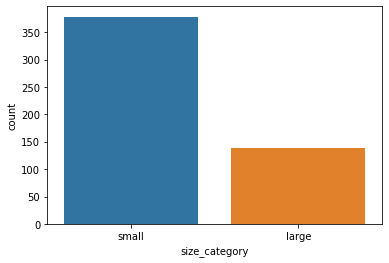

In [11]:
sns.countplot(x="size_category",data=forestfire)

<AxesSubplot:xlabel='FFMC', ylabel='Density'>

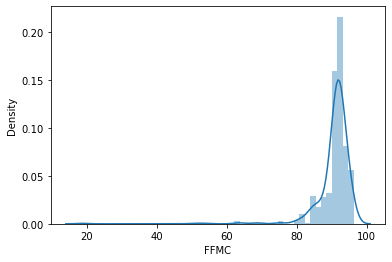

In [12]:
sns.distplot(forestfire['FFMC'])

<AxesSubplot:xlabel='DMC', ylabel='Density'>

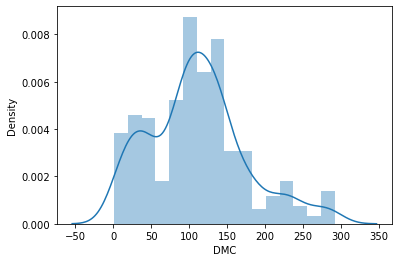

In [13]:
sns.distplot(forestfire['DMC'])

<AxesSubplot:xlabel='temp', ylabel='Density'>

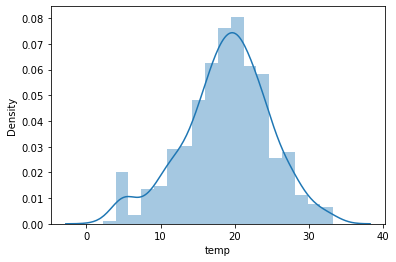

In [14]:
sns.distplot(forestfire['temp'])

<AxesSubplot:xlabel='wind', ylabel='Density'>

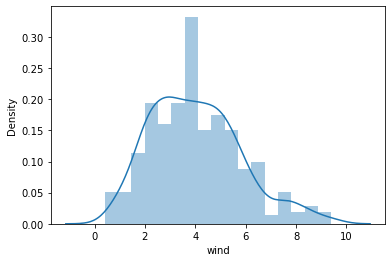

In [15]:
sns.distplot(forestfire['wind'])

<AxesSubplot:xlabel='rain', ylabel='Density'>

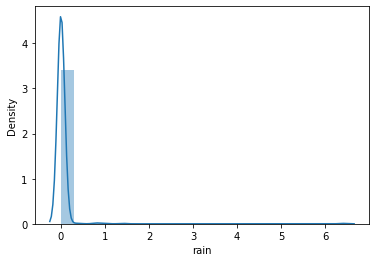

In [16]:

sns.distplot(forestfire['rain'])

<AxesSubplot:xlabel='area', ylabel='Density'>

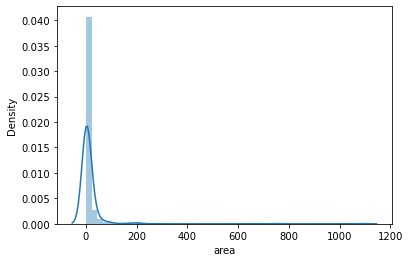

In [17]:
sns.distplot(forestfire['area'])

In [18]:
X=forestfire.drop(columns="size_category",axis=1)
Y=forestfire[["size_category"]]

In [19]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [20]:
df=pd.DataFrame(std.fit_transform(X))
df.columns=X.columns
df["size_category"]=Y

In [21]:
df

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.202020,small
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.202020,small
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.202020,small
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.202020,small
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.202020,small
...,...,...,...,...,...,...,...,...,...,...
512,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.753800,-0.736124,-0.073268,-0.100753,large
513,-1.640083,-0.846648,0.474768,-1.563460,0.519019,1.638592,0.995798,-0.073268,0.651674,large
514,-1.640083,-0.846648,0.474768,-1.563460,0.398350,1.577248,1.498614,-0.073268,-0.026532,large
515,0.680957,0.549003,0.269382,0.500176,1.156839,-0.140366,-0.009834,-0.073268,-0.202020,small


In [22]:
Y

,size_category
0,small
1,small
2,small
3,small
4,small
...,...
512,large
513,large
514,large
515,small


In [23]:
small_df=df[df["size_category"]=="small"]
large_df=df[df["size_category"]=="large"]

In [24]:
#model building
x=df.drop(columns="size_category",axis=1)
y=df[["size_category"]]

In [25]:
#train test model
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [27]:
from sklearn.svm import SVC

In [28]:
linear_model=SVC(C=1,kernel="linear",random_state=1)

In [29]:
linear_model.fit(x_train,y_train)

SVC(C=1, kernel='linear', random_state=1)

In [30]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [31]:
y_train_pred=linear_model.predict(x_train)

In [32]:
y_train_pred

array(['large', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'large',
       'small', 'small', 'small', 'large', 'small', 'small', 'small',
       'small', 'large', 'small', 'small', 'large', 'small', 'small',
       'large', 'small', 'small', 'large', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'large', 'small', 'small', 'large', 'small', 'small', 'large',
       'large', 'small', 'small', 'small', 'large', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'large', 'small', 'small', 'large',
       'small', 'small', 'small', 'small', 'large', 'large', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'large', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'sma

In [33]:
y_test_pred=linear_model.predict(x_test)

In [34]:
y_test_pred

array(['small', 'large', 'small', 'small', 'small', 'small', 'large',
       'large', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'large', 'small', 'small',
       'small', 'small', 'small', 'small', 'large', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'large', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'large', 'small', 'small',
       'large', 'small', 'small', 'small', 'large', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'large', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'large', 'small',
       'small', 'large', 'small', 'small', 'small', 'small', 'small',
       'small', 'large', 'small', 'small', 'small', 'small', 'small',
       'large', 'small', 'large', 'large', 'small', 'small', 'large',
       'small', 'lar

In [35]:
accuracy_score(y_train,y_train_pred)

0.9007263922518159

In [36]:
accuracy_score(y_test,y_test_pred)

0.9423076923076923

In [37]:
confusion_matrix(y_test,y_test_pred)

array([[19,  6],
       [ 0, 79]], dtype=int64)

In [38]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

       large       1.00      0.64      0.78       114
       small       0.88      1.00      0.94       299

    accuracy                           0.90       413
   macro avg       0.94      0.82      0.86       413
weighted avg       0.91      0.90      0.89       413



In [39]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

       large       1.00      0.76      0.86        25
       small       0.93      1.00      0.96        79

    accuracy                           0.94       104
   macro avg       0.96      0.88      0.91       104
weighted avg       0.95      0.94      0.94       104



In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
grid_linear=GridSearchCV(estimator=linear_model,param_grid={"C":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
                                                         "gamma":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]})

In [42]:
grid_linear.fit(x_train,y_train)

GridSearchCV(estimator=SVC(C=1, kernel='linear', random_state=1),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                         'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1]})

In [43]:
grid_linear.best_params_

{'C': 1, 'gamma': 0.1}

In [44]:
grid_linear.best_score_

0.8765207170143989